<a href="https://colab.research.google.com/github/Scott16198/Scott16198/blob/main/SLMLTitanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [482]:
from google.colab import files
titanic = files.upload()

Saving Titanic.csv to Titanic (3).csv


In [512]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
# Import sklearn libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
# Import the Naive Bayes, logistic regression, Bagging, RandomForest, AdaBoost, GradientBoost, Decision Trees and SVM Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib import style
#plt.style.use('bmh')
#plt.style.use('ggplot')
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

In [484]:
titanic = pd.read_csv('Titanic.csv')
y = titanic['Survived'] 
X = titanic.drop(['PassengerId'], axis = 1) 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Looking for Missing Data

In [485]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [486]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarkment are missing Data

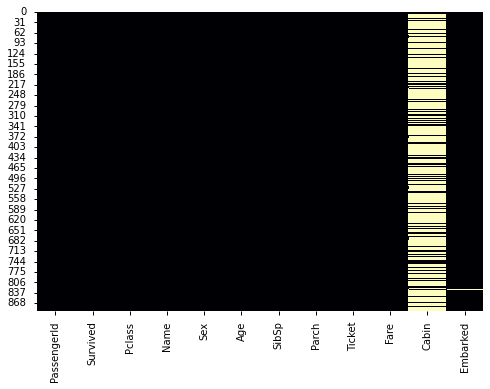

In [513]:
sns.heatmap(titanic.isnull(),cmap='magma',cbar = False)

## Now we look at Survival of the Sexes

In [490]:
sur = titanic['Survived'].value_counts()
survival_rate = [sur[0]/len(titanic)*100,sur[1]/len(titanic)*100]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SURVIVAL CHART')

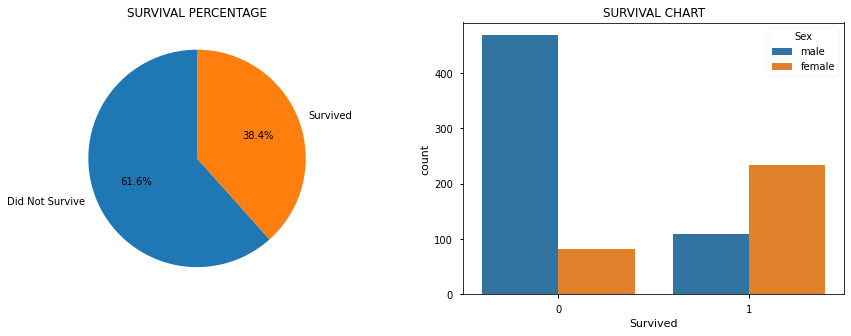

In [526]:

fig,ax = plt.subplots(nrows=1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(survival_rate,labels = ['Did Not Survive','Survived'],autopct='%1.1f%%',startangle = 90)
plt.title('SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)
sns.countplot('Survived',data = titanic,hue = 'Sex')
plt.title('SURVIVAL CHART')

In [492]:
survived_male = len(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)])/len(titanic[titanic['Sex'] == 'male'])*100
survived_female = len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)])/len(titanic[titanic['Sex'] == 'female'])*100
male = [survived_male,100-survived_male]
female = [survived_female, 100-survived_female]

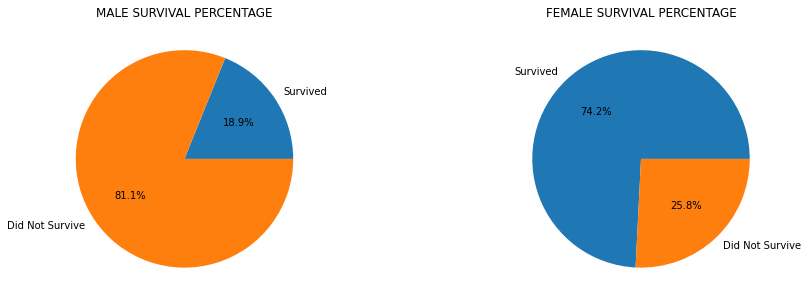

In [493]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(male,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 0)
plt.title('MALE SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)
plt.pie(female,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 0)
plt.title('FEMALE SURVIVAL PERCENTAGE')
plt.show()

## Not too Good for the Gentelmen

## Looking at Passenger by Class

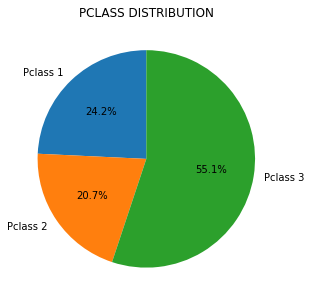

In [494]:
plt.subplots(figsize = (15,5))
Pclass = [len(titanic[(titanic['Pclass'] == 1)])/len(titanic)*100,len(titanic[(titanic['Pclass'] == 2)])/len(titanic)*100,len(titanic[(titanic['Pclass'] == 3)])/len(titanic)*100]
plt.pie(Pclass,labels = ['Pclass 1','Pclass 2','Pclass 3'],autopct='%1.1f%%',startangle = 90)
plt.title('PCLASS DISTRIBUTION')
plt.show()

##55% were 3rd class

## survival of class passengers

In [495]:
survived_class_1 = len(titanic[(titanic['Pclass'] == 1) & titanic['Survived'] == 1])/len(titanic[(titanic['Pclass'] == 1)])*100
survived_class_2 = len(titanic[(titanic['Pclass'] == 2) & titanic['Survived'] == 1])/len(titanic[(titanic['Pclass'] == 2)])*100
survived_class_3 = len(titanic[(titanic['Pclass'] == 3) & titanic['Survived'] == 1])/len(titanic[(titanic['Pclass'] == 3)])*100
class_1 = [survived_class_1,100-survived_class_1]
class_2 = [survived_class_2,100-survived_class_2]
class_3 = [survived_class_3,100-survived_class_3]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


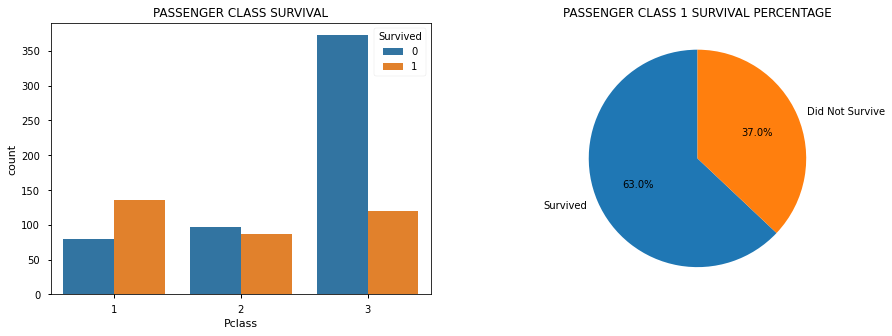

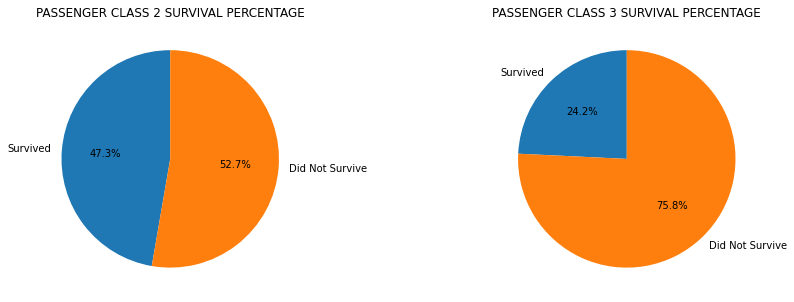

In [496]:
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot('Pclass',data = titanic,hue = 'Survived')
plt.title('PASSENGER CLASS SURVIVAL',)
plt.subplot(1,2,2)
plt.pie(class_1,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('PASSENGER CLASS 1 SURVIVAL PERCENTAGE')
plt.show()

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(class_2,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('PASSENGER CLASS 2 SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)
plt.pie(class_3,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('PASSENGER CLASS 3 SURVIVAL PERCENTAGE')
plt.show()

## Good for first class not so much for the third class folks

## Looking at Survival by Embarkation point

In [527]:
survived_S = len(titanic[(titanic['Embarked'] == 'S') & (titanic['Survived'] == 1)])/len(titanic[titanic['Embarked'] == 'S'])*100
survived_C = len(titanic[(titanic['Embarked'] == 'C') & (titanic['Survived'] == 1)])/len(titanic[titanic['Embarked'] == 'C'])*100
survived_Q = len(titanic[(titanic['Embarked'] == 'Q') & (titanic['Survived'] == 1)])/len(titanic[titanic['Embarked'] == 'Q'])*100
S = [survived_S,100-survived_S]
C = [survived_C,100-survived_C]
Q = [survived_Q,100-survived_Q]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


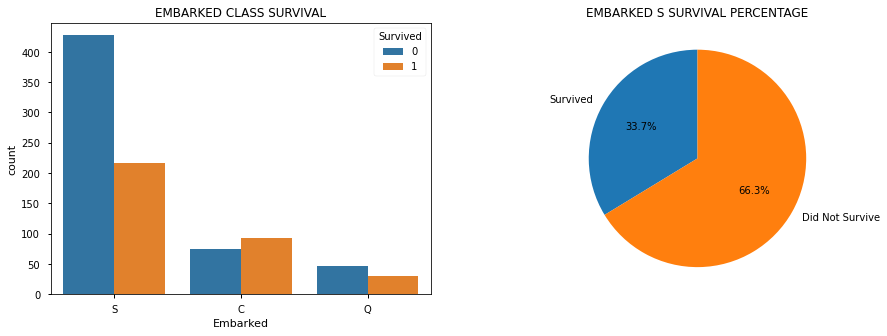

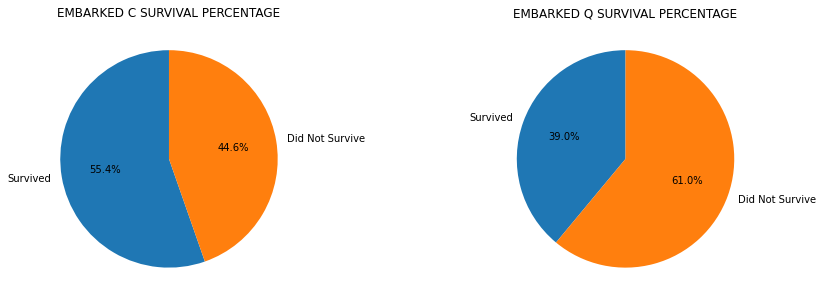

In [498]:
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot('Embarked',data = titanic,hue = 'Survived')
plt.title('EMBARKED CLASS SURVIVAL')
plt.subplot(1,2,2)
plt.pie(S,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('EMBARKED S SURVIVAL PERCENTAGE')
plt.show()

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(C,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('EMBARKED C SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)
plt.pie(Q,labels = ['Survived','Did Not Survive'],autopct='%1.1f%%',startangle = 90)
plt.title('EMBARKED Q SURVIVAL PERCENTAGE')
plt.show()

## Cherbourn had a higher survival rate than other points
## Southhampton had the highest survival rate

## Distribution of Fares vs Survival

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

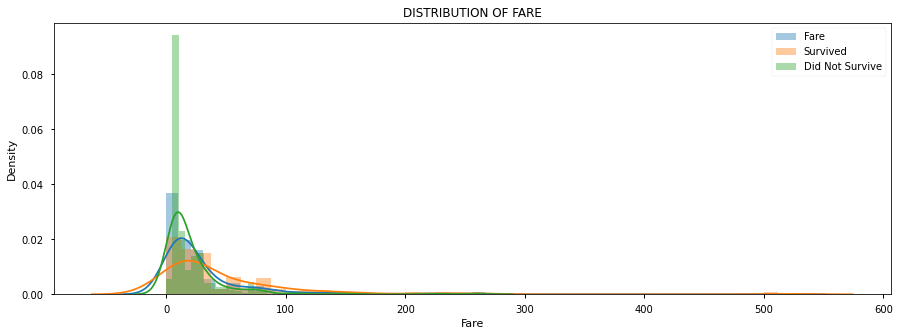

In [499]:
fig,ax = plt.subplots(figsize = (15,5))
sns.distplot(titanic['Fare'],label = 'Fare')
sns.distplot(titanic[titanic['Survived'] == 1]['Fare'],label = 'Survived')
sns.distplot(titanic[titanic['Survived'] == 0]['Fare'],label = 'Did Not Survive')
plt.title('DISTRIBUTION OF FARE')
plt.legend()
plt.show()

##

#Sibling and spouse vs Parent Child

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


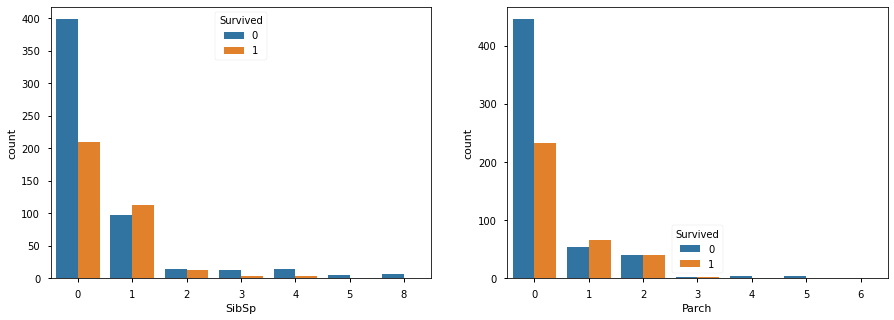

In [500]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot('SibSp',data = titanic,hue = 'Survived')
plt.subplot(1,2,2)
sns.countplot('Parch',data = titanic,hue = 'Survived')
plt.show()

## We see that singles and smaller families survived better

## We know Age, Embarkment and Cabin are missing values. We fix that now

##Attacking the Age Nulls

In [501]:
titanic['Age'].mode()


0    24.0
dtype: float64

In [502]:
titanic['Age'].median()



28.0

In [503]:
titanic['Age'].mean()

29.69911764705882

In [504]:
titanic['Age_Mode'] = titanic['Age'].fillna(value = 24)
titanic['Age_Med'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Age_Mean'] = titanic['Age'].fillna(titanic['Age'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

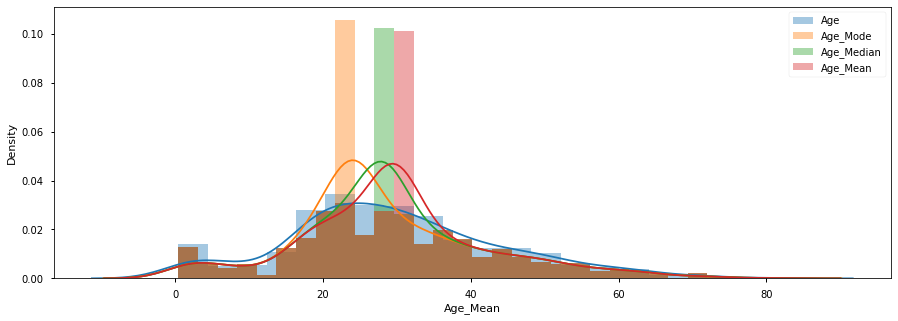

In [505]:
fig,ax = plt.subplots(figsize = (15,5))
sns.distplot(titanic['Age'],label = 'Age')
sns.distplot(titanic['Age_Mode'],label = 'Age_Mode')
sns.distplot(titanic['Age_Med'],label = 'Age_Median',)
sns.distplot(titanic['Age_Mean'],label = 'Age_Mean')
plt.legend()
plt.show()

## Filling the missing Age with Median Age

In [506]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic = titanic.drop(columns= ['Age_Mode','Age_Med','Age_Mean'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Age is cleaned 

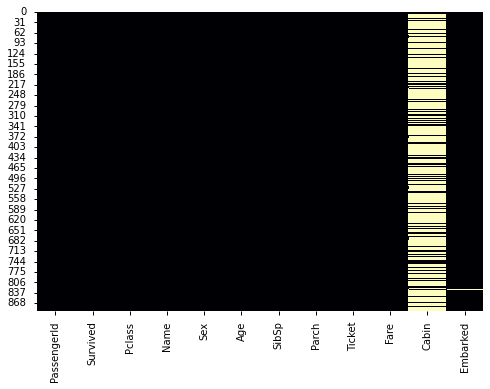

In [507]:
sns.heatmap(titanic.isnull(),cmap='magma',cbar = False)

## Grouping the Ages now

In [386]:
def get_age_group(dataframe,column_name):
    
    dataframe[column_name] = dataframe[column_name].apply(np.ceil)
    age_group = {0:list(range(0,10)),1:list(range(10,21)),2:list(range(21,31)),3:list(range(31,41)),4:list(range(41,51)),5:list(range(51,115))}
    col = list(dataframe.columns)
    index = col.index(column_name)
    age = []
    
    for j in range(len(dataframe)):
        for k in age_group.keys():
            for i in range(len(age_group[k])):
                if (age_group[k][i] == dataframe.iloc[j,index]):
                    age.append(k)
    dataframe['Age_Group'] = age

In [388]:
get_age_group(titanic,'Age')

## Ages vs Survival

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


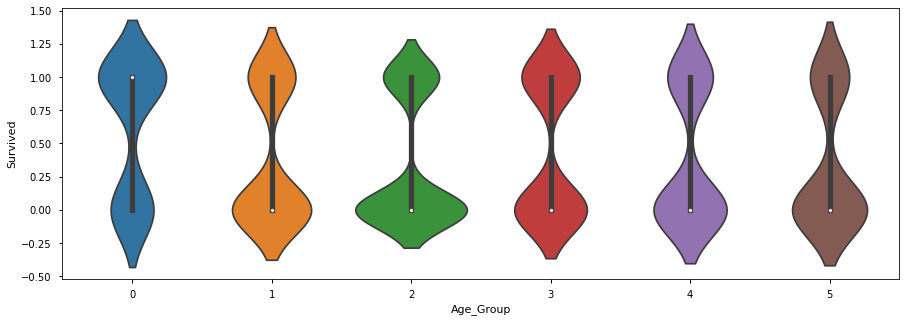

In [389]:
plt.subplots(figsize = (15,5))
sns.violinplot('Age_Group','Survived',data = titanic)
plt.show()

## Age Fare survival Scatterplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


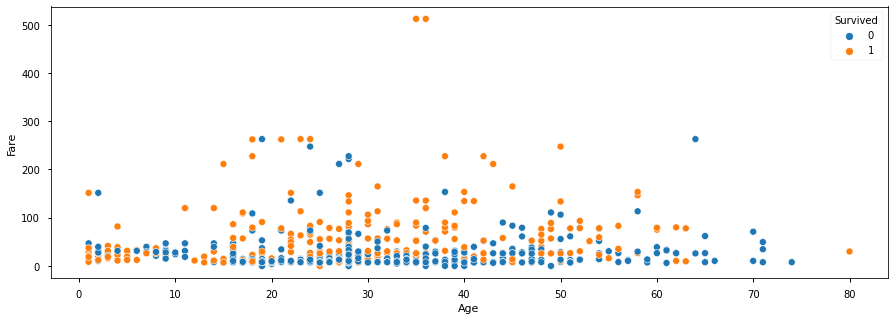

In [390]:
plt.subplots(figsize = (15,5))
sns.scatterplot('Age','Fare',data = titanic,hue = 'Survived')

In [404]:
def get_initials(dataframe,column_name):
    sub = []
    initials = ['Mrs.','Ms.','Mr.','Miss.','Master.','Lady.','Don.','Rev.','Dr.','Mme.','Major.','Sir.','Mlle.','Col.','Capt.','Countess.','Jonkheer.','Dona.']
    name = dataframe[column_name]
    for i in range(len(name)):
        split_names = name[i].split()
        for j in range(len(split_names)):
            if (split_names[j] in initials):
                sub.append(split_names[j])
    dataframe[column_name] = sub

## Separating The Initials

In [405]:
get_initials(titanic,'Name')
titanic['Name'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name, dtype: int64

In [406]:
le = LabelEncoder()
titanic['Name'] = le.fit_transform(titanic['Name'])
encoded_values = titanic['Name'].unique()
decoded_values = le.inverse_transform(encoded_values)
initials = {}
for i in range(len(encoded_values)):
    initials.setdefault(decoded_values[i],encoded_values[i])

In [410]:
titanic['Name'] = le.fit_transform(titanic['Name'])
titanic['Sex'] = le.fit_transform(titanic['Sex'])
embarked = {0:'S',1:'C',2:'Q'}
titanic['Embarked'] = titanic['Embarked'].fillna('Q')
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])

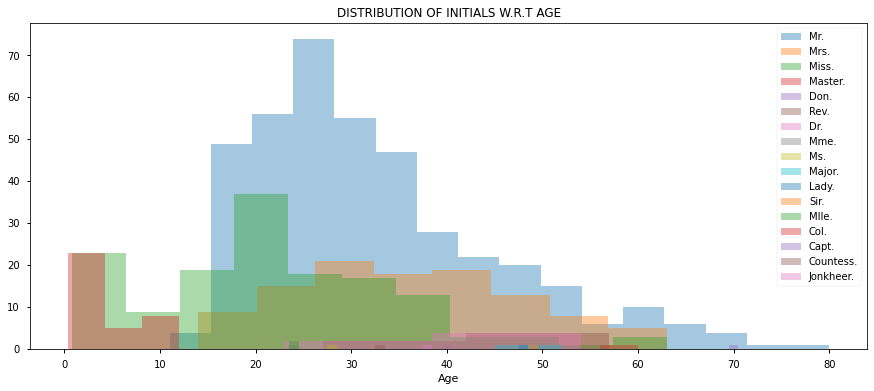

In [413]:
plt.subplots(figsize = (15,6))
for keys,values in initials.items():
    sns.distplot(titanic[titanic['Name'] == values]['Age'],label = keys,kde = False)
plt.title('DISTRIBUTION OF INITIALS W.R.T AGE')
plt.legend()
plt.show()

KeyError: ignored

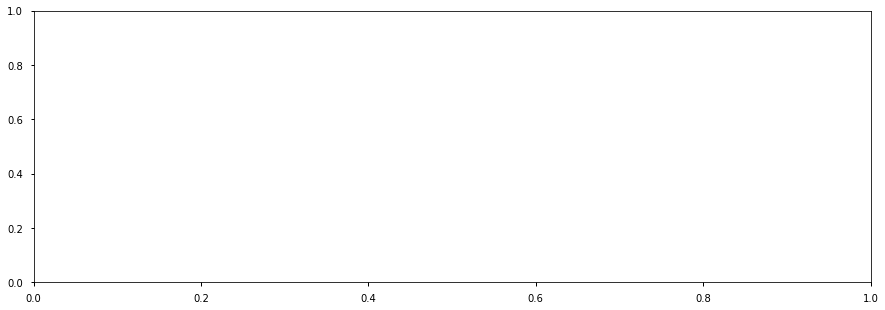

In [414]:
plt.subplots(figsize = (15,5))
for keys,values in initials.items():
    sns.distplot(titanic[titanic['Name'] == values]['Age_Group'],label = keys,kde = False)
plt.title('DISTRIBUTION OF INITIALS W.R.T AGE_GROUP')
plt.legend()
plt.show()

## Converting Catagorical Letters to Numerical Values

In [415]:
titanic['Name'] = le.fit_transform(titanic['Name'])
titanic['Sex'] = le.fit_transform(titanic['Sex'])
embarked = {0:'S',1:'C',2:'Q'}
titanic['Embarked'] = titanic['Embarked'].fillna('Q')
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])

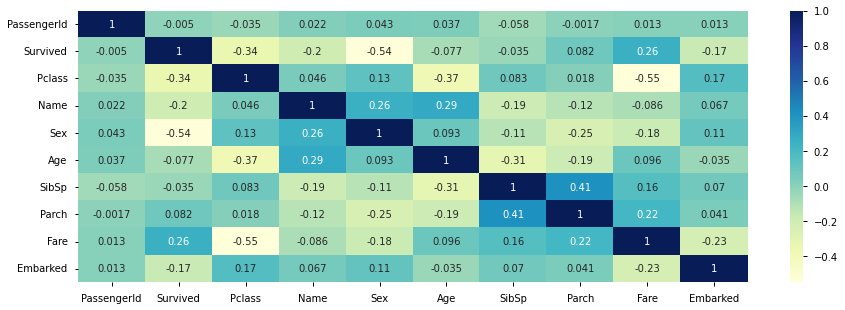

In [419]:
plt.subplots(figsize = (15,5))
sns.heatmap(titanic.corr(),cmap = 'YlGnBu',cbar = True,annot = True)

## Dropping Superfluous Columns

In [320]:
titanic = titanic.drop(columns = ['PassengerId','Ticket','Cabin','Age_Group'])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,12,1,22.0,1,0,7.2500,2
1,1,1,13,0,38.0,1,0,71.2833,0
2,1,3,9,0,26.0,0,0,7.9250,2
3,1,1,13,0,35.0,1,0,53.1000,2
4,0,3,12,1,35.0,0,0,8.0500,2


## The Best Features

In [322]:
features = titanic.iloc[:,1:]
target = titanic.iloc[:,0]

In [323]:
best_features = SelectKBest(score_func = chi2,k = 8)
fit = best_features.fit(features,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Column','Score'] 
print(featureScores.nlargest(8,'Score'))

     Column        Score
6      Fare  4518.319091
2       Sex    92.702447
0    Pclass    30.873699
3       Age    21.856793
1      Name    11.183332
7  Embarked    10.660296
5     Parch    10.097499
4     SibSp     2.581865


In [324]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,12,1,22.0,1,0,7.2500,2
1,1,1,13,0,38.0,1,0,71.2833,0
2,1,3,9,0,26.0,0,0,7.9250,2
3,1,1,13,0,35.0,1,0,53.1000,2
4,0,3,12,1,35.0,0,0,8.0500,2


## Dropping More Columns

In [325]:
titanic = titanic.drop(columns = ['Embarked','SibSp','Parch'])
titanic.head()

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,12,1,22.0,7.2500
1,1,1,13,0,38.0,71.2833
2,1,3,9,0,26.0,7.9250
3,1,1,13,0,35.0,53.1000
4,0,3,12,1,35.0,8.0500


In [420]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = titanic[['Pclass','Sex','Name','Fare']].values
features = sc.fit_transform(features)
target = titanic['Survived'].values

## Splitting the Data

In [421]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)

In [422]:
def model(classifier):
    
    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    print("ACCURACY : ",'{0:.2%}'.format(accuracy_score(y_test,prediction))) 
    print("CROSS VALIDATION SCORE : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = 10,scoring = 'accuracy').mean()))
    print("ROC_AUC SCORE : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, X_test,y_test)
    plt.title('ROC_AUC_PLOT')
    plt.show()

## Confusion Matrix

In [328]:
def model_evaluation(classifier):
    
    # CONFUSION MATRIX
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    tn,fp,fn,tp = cm.flatten()
    
    # PRECISION
    print('PRECISION : ','{0:.2%}'.format(tp/(tp + fp)))
    
    # RECALL
    print('RECALL : ','{0:.2%}'.format(tp/(tp + fn)))

In [463]:
def grid_search_cv(classifier,hyperparameters):
    
    GSCV = GridSearchCV(classifier,hyperparameters,cv = 10)
    model = GSCV.fit(X_test,y_test)
    print(model)
    print('HIGHEST ACCURACY : ','{0:.2%}'.format(model.best_score_))
    print('BEST PARAMETERS : ',model.best_params_)

## Logistic Regression

In [424]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

## Area under the curve

ACCURACY :  77.58%
CROSS VALIDATION SCORE :  78.46%
ROC_AUC SCORE :  76.63%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


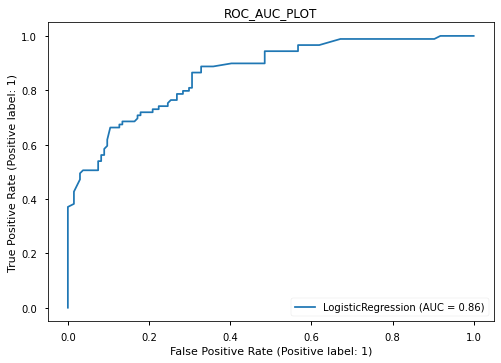

In [425]:
model(classifier_lr)

# Linear Regression Results
#Accuracy 77.58
#cross val score 78.46
#Area under Curve 86%


## Confusion Matrix for Logistic Regression

PRECISION :  71.91%
RECALL :  71.91%


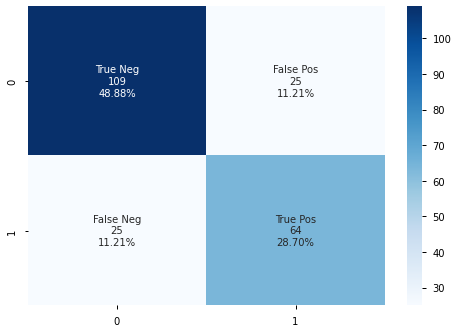

In [333]:
model_evaluation(classifier_lr)

In [430]:
classifier_dte = DecisionTreeClassifier(criterion = 'entropy')

ACCURACY :  83.41%
CROSS VALIDATION SCORE :  81.13%
ROC_AUC SCORE :  81.85%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


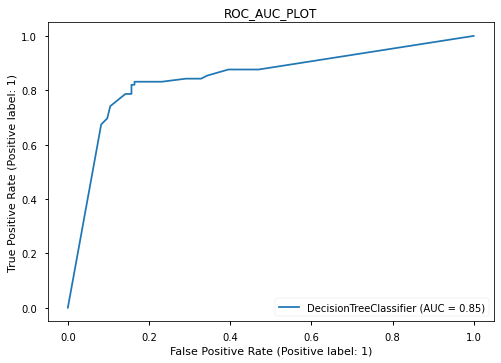

In [431]:
model(classifier_dte)

# Decision Tree Entropy
# Accuracy 83.41
# Cross val Score 81.13
# Area Under Curve 85%

#Confusion Matrix for Decision Tree Entropy

PRECISION :  82.50%
RECALL :  74.16%


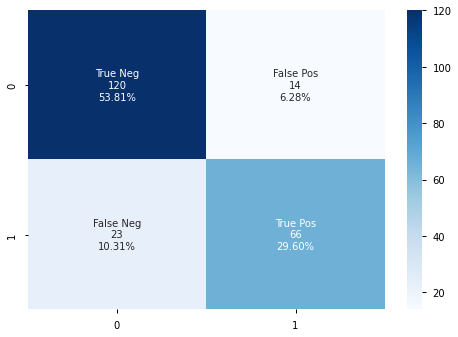

In [432]:
model_evaluation(classifier_dte)

# Decision Tree Gini

ACCURACY :  83.41%
CROSS VALIDATION SCORE :  80.99%
ROC_AUC SCORE :  81.85%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


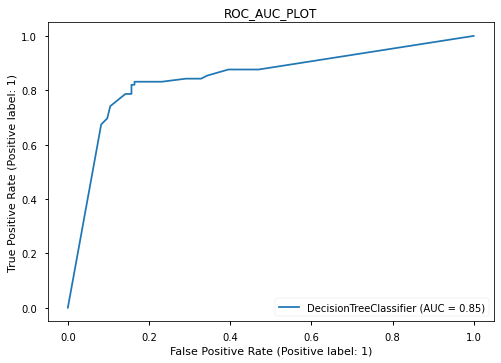

In [433]:
classifier_dtg = DecisionTreeClassifier(criterion = 'gini')
model(classifier_dtg)

# Decision tree Gini
# Accuracy 83.41
#Cross Val score 80.99
# Area under Curve 80%

#Confusion Tree Matrix for DT gini

PRECISION :  82.50%
RECALL :  74.16%


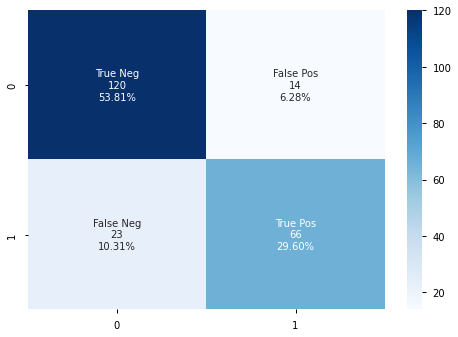

In [434]:
model_evaluation(classifier_dtg)

# Random Forest 

In [435]:
classifier_rf = RandomForestClassifier(max_depth = 2,random_state = 0)

ACCURACY :  78.92%
CROSS VALIDATION SCORE :  78.60%
ROC_AUC SCORE :  77.75%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


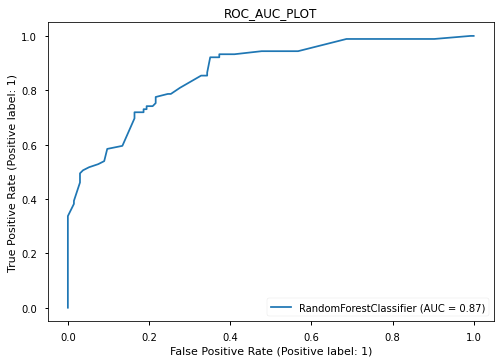

In [436]:
model(classifier_rf)

# Random Forest
#Accuracy 78.92
# Cross val Score 78.60
# Area Under Curve 87%

# Confusion Matrix for Random Forest

PRECISION :  74.42%
RECALL :  71.91%


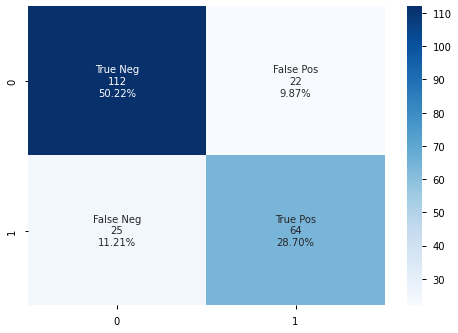

In [437]:
model_evaluation(classifier_rf)

K Nearest Neighbor

In [438]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 7,p = 1)

In [439]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid_search_cv(classifier_knn,hyperparameters)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(leaf_size=1, n_neighbors=7, p=1),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})
HIGHEST ACCURACY :  81.56%
BEST PARAMETERS :  {'leaf_size': 1, 'n_neighbors': 7, 'p': 1}


ACCURACY :  84.75%
CROSS VALIDATION SCORE :  78.89%
ROC_AUC SCORE :  84.11%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


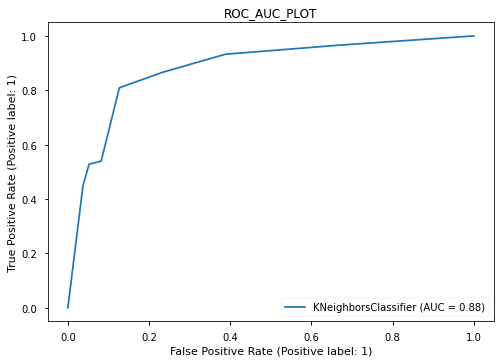

In [440]:
model(classifier_knn)

# K Nearest Neighbor
# Accuracy 84.75
#Cross val Score 78.89
#Area Under Curve 88%

# Confusion Matrix for KNN

PRECISION :  80.90%
RECALL :  80.90%


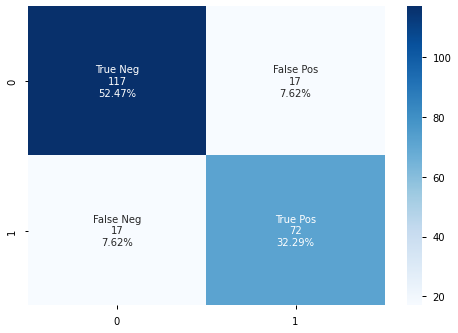

In [441]:
model_evaluation(classifier_knn)

In [464]:
models = {'MODELS':['LOGISTIC REGRESSION','SUPPORT VECTOR CLASSIFIER','DECISION TREE CLASSIFIER Entropy',' DECISION TREE CLADDIFIER GINI','RANDOM FOREST CLASSIFIER','K-NEAREST NEIGHBORS'],
         'CROSS VAL ACCURACY (%)':[78.46,79.19,81.13,80.99,78.6,81.10]}

# And the Winner Is.........Drum Roll

In [465]:
cross_val = pd.DataFrame(models)
cross_val.head()

,MODELS,CROSS VAL ACCURACY (%)
0,LOGISTIC REGRESSION,78.46
1,SUPPORT VECTOR CLASSIFIER,79.19
2,DECISION TREE CLASSIFIER Entropy,81.13
3,DECISION TREE CLADDIFIER GINI,80.99
4,RANDOM FOREST CLASSIFIER,78.60


####Decision Tree Entropy

#Now for the test data

In [479]:

X_test = pd.read_csv('Titanic.csv')

# dropping some columns

In [480]:
passenger_id = X_test['PassengerId']
X_test = X_test.drop(columns = ['PassengerId', 'Survived','Age','SibSp','Parch','Ticket','Cabin','Embarked'])
X_test.head()

,Pclass,Name,Sex,Fare
0,3,"Braund, Mr. Owen Harris",male,7.2500
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833
2,3,"Heikkinen, Miss. Laina",female,7.9250
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1000
4,3,"Allen, Mr. William Henry",male,8.0500


#Changing the Catagorical Data to Numerical Values

In [468]:
get_initials(X_test,'Name')
X_test['Name'] = le.fit_transform(X_test['Name'])
X_test['Sex'] = le.fit_transform(X_test['Sex'])
X_test.head()

,Pclass,Name,Sex,Fare
0,3,12,1,7.2500
1,1,13,0,71.2833
2,3,9,0,7.9250
3,1,13,0,53.1000
4,3,12,1,8.0500


In [481]:
X_test = sc.fit_transform(X_test)
#X_test.head()


ValueError: ignored

#My Submission

In [478]:
prediction = classifier_dtg.predict(X_test)
prediction = pd.DataFrame({'PassengerId':passenger_id,'Survived':prediction})

prediction

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1
